# ERRORS IN NUMERICAL METHODS

Error is defined as the difference between the true value and the approximate value.

```
Error = True Value - Approximate Value
```

***For example :***

If <br>
`T = 2.3758932` <br>
and we approximate `T` as :<br>
`A = 2.3758`

Then, Error (E) is 

```
E = T - A
E = 2.3758932 - 2.3758
E = 0.0000932
```

## Types of Error

There are 3 types of error :

##### 1. Absolute Error ($\epsilon$)
The absolute error is defined as follows :

$\epsilon = |T-A|$

##### 2. Relative Error ($\epsilon_r$)

The relative error is defined as follows :

$\epsilon_r = \frac{T-A}{T}$

##### 3. Relative Percentage Error ($\epsilon_p$)

The relative error is defined as follows :

$\epsilon_p = \frac{T-A}{T} \times 100\% $

## Cause of Error
---
There are mainly two causes that arises error, they are :

1. Error due to rounding-off
2. Error due to chopping

### Error due to Rounding-off
---

Error arises due to rounding-off a number is called round-off error.

***For example :***

If <br>
`T = 0.52768`<br> 
and by rounding-off upto 3 significant places after the decimal point, we approximate `T` as :<br>
`A = 0.528`

Then, Absolute round-off error (E) is : 

```
E = |T - A|
E = |0.52768 - 0.528|
E = |-0.00032|
E = 0.00032
```

### Error due to Chopping
---

Error arises due to direct chopping-off a number to some significant decimal places is called chopping error.

***For example :***

If<br> 
`T = 0.52768`<br> 
and by chopping upto 3 significant places after the decimal point, we approximate `T` as :<br>
`A = 0.527`

Then, Absolute chopping error (E) is : 
```
E = |T - A|
E = |0.52768 - 0.527|
E = |-0.00068|
E = 0.00068
```

From the perspective of applied mathematics, there can be 3 types of error as well, such as :

#### 1. Programming Error 
Error arises due to the computer programming is called *Programming error*.

#### 2. Experimental Error
Error that arises due to the measurement of data is called as *experimental error*.

#### 3. Truncation Error
Error that arises due to approximation of an infinite series by its first few terms is called *truncation error*.Truncation error lowers as we take more and more terms of the infinite series into account.

Let's see the example in MATLAB/OCTAVE :

***Example-1 :***

Let's take the Maclauren series :

$e^a = 1 + a + \frac{a^2}{2!} + \frac{a^3}{3!} +....+\frac{a^n}{n!} $

and see how the error decreases with increase in the number of terms (n-value)

E =

 Columns 1 through 4:

   0.0051709180756   0.0001709180756   0.0000042514090   0.0000000847423

 Column 5:

   0.0000000014090



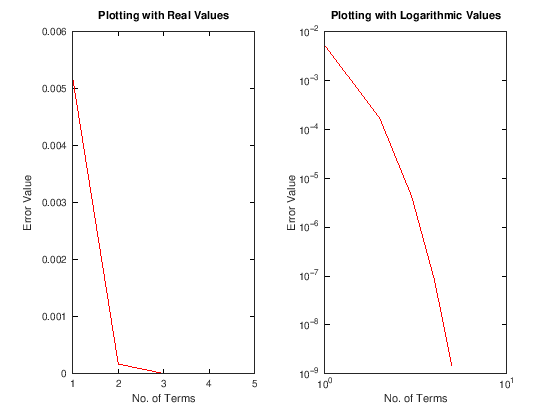

In [4]:
% Maclauren Series %
%==================%

% Number of terms:

n = [1:5];

% Initializing 'a':

a = 0.1;

% Calculating true value:

T = exp(a);

% Initializing an array to store the approximate values with varying values of 'n' :

A = ones(1,5);

% Approximate values :

A = A + cumsum(a.^n ./ factorial(n));

% Absolute error :

E = abs(T-A)

% Plotting the error curver :
%----------------------------

% Plotting with real values

subplot(1,2,1);
plot(n,E,"-r");
title("Plotting with Real Values");
xlabel("No. of Terms");
ylabel("Error Value");

% Plotting as loglog plot

subplot(1,2,2);
loglog(n,E,"-r");
title("Plotting with Logarithmic Values");
xlabel("No. of Terms");
ylabel("Error Value");

>***Notes :***
    - More terms (n) leads to lower error.
    - Smaller 'a' leads to low error.
    - Slope gives the order of accuracy.

## Machine Precision
---
We can think of the machine precession as the least count of any measurement system.

***For example :***

The least count of ruler is $0.1 mm$ and if we want to measure something whose thickness/length is less that $0.1 mm$ then, we have to use another measurement system called a "*Vernier Caliper*", that has a least count of $0.01 mm$.

Just like these measuring instruments, real numbers also have a "*least count*" and therefore the "*Machine Precision*" depends upon the number of bytes to store a real number.

### Floating Point Representation 
---
The floating point representation of a number is as follows :

$23.217$ is represented as $0.232217 \times 10^2$ and<br>
$23.218$ is represented as $0.232218 \times 10^2$

but, if the machine can store upto 5 digits after the decimal point and then, we have a number like $23.217$ then, it can be represented as $0.232217 \times 10^2$

Therefore, now the $23.217$ and $23.2172$ has the same floating point representation, although the two values are not exactly equal to each other.

So, we can say that the *least count* of this decimal machine is $~ 0.00001|x|$ or, $10^{-5}$

## Effect of Round-off errors
---
From derivatives definition :

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} \implies  f'(x) \approx \frac{f(x+h) - f(x)}{h}   $$

From the above equation, it is evident that smaller $h$ values, i.e., $h$ value much closer to $0$ is likely to minimize the error.

From Taylor's series :

$$ f'(x+h) = f(x)+ hf'(x) + \frac{h^2}{2} f''(x)+.... \implies  f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

Therefore, we can use the Taylor's series expansion to find derivatives and thereby, validating the round-off errors.

***Example-1 :***

We know that : $\frac{d}{dx} tan^{-1}(x) = \frac{1}{1+x^2}$

Now, let's find out the error between the derivative of $tan^{-1}(x)$ found as per the above formula with that of found using the Taylor's series with decreasing value of $h$

In MATLAB/OCTAVE, the code will be as follows :

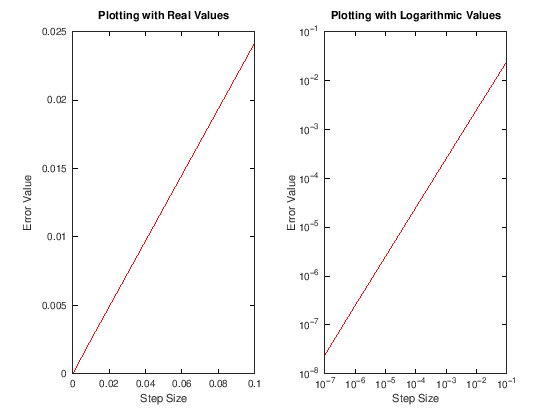

In [8]:
% Taylor's Series %
%==================%

% Initializing 'x':

x = 1;

% Calculating true value:

T = 1/(1 + x^2);

% Getting approximate values & errors associated (with Taylor's series) by decreasing step size (h) with loop :

for i = 1:7
    h = 10^(-i);
    A = ( atan(x+h)-atan(x) ) / h;
    
    E = abs(T-A);
    
    % Storing h-values and respective error associated in an array for plotting :
    
    hval(i) = h;
    errval(i) = E;
end

% Plotting the error curver :
%----------------------------

% Plotting with real values

subplot(1,2,1);
plot(hval, errval, "-r");
title("Plotting with Real Values");
xlabel("Step Size");
ylabel("Error Value");

% Plotting with log scale

subplot(1,2,2);
loglog(hval, errval,"-r");
title("Plotting with Logarithmic Values");
xlabel("Step Size");
ylabel("Error Value");

By running the above code, we can see that our error decreases as we decrease the value of $h$.

> **_Notes :_**
   - The error term is a function of $h$, i.e. $E=f(h)$ and thats why in the loglog plot, we got a straight line with $slope = 1$.
   - The straight line slope is going to be same as the order of accuracy of the numerical scheme.

But, let's plot the same graph by further decreasing the $h$ value , let's say upto the order of $10^{-20}$

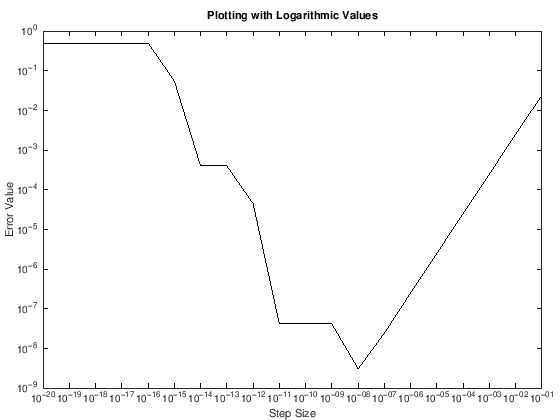

In [9]:
% Analyzing MATLAB/OCTAVE Machine Precesion with Taylor's Series %
%================================================================%

% Initializing 'x':

x = 1;

% Calculating true value:

T = 1/(1 + x^2);

% Getting approximate values & errors associated (with Taylor's series) by decreasing step size (h) with loop :

for i = 1:20
    h = 10^(-i);
    A = ( atan(x+h)-atan(x) ) / h;
    
    E = abs(T-A);
    
    % Storing h-values and respective error associated in an array for plotting :
    
    hvals(i) = h;
    errvals(i) = E;
end

% Plotting the error curver with logarithmic Scale : %
%----------------------------------------------------%

loglog(hvals, errvals,"-k");
title("Plotting with Logarithmic Values");
xlabel("Step Size");
ylabel("Error Value");

Now, we can see that the error decreases with $h$ but, up to a certain value and after that it starts increasing again (from $h \approx 10^{-8}$.

This is because of the _machine precision_ of MATLAB, which is $2.2204e^{-16}$.

So, when the $h$ value crosses that _machine precision_, we get ambiguous results because of round-off errors.

>***Notes :***
 - Truncation error decreases with $h$, however, machine precession can determine how small our $h$ should be.
 - Round-off error increases with $h$.